### A. KHởi ĐỘNG
Một số tham số (parameter) của mô hình mạng neural?
--> weight, learning rate, layer size
Một số siêu tham số (hyperparameter) của mô hình mạng neural?
--> learning rate, batch size, momentum
Một số phương pháp tối ưu mô hình mạng neural đã học?
--> SGD, Mini-batch Gradient Descent, Adam




## B. Bộ dữ liệu

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch import nn

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 11291665.59it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 197976.15it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3723598.01it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16803328.40it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(training_data.targets)
# tap train co do dai la 60000

60000

In [ ]:
training_data.targets.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
len(training_data.data), len(test_data.data), len(training_data.targets), len(test_data.targets)

(60000, 10000, 60000, 10000)

In [ ]:
image, label = training_data[0]

In [ ]:
image.shape

torch.Size([1, 28, 28])

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

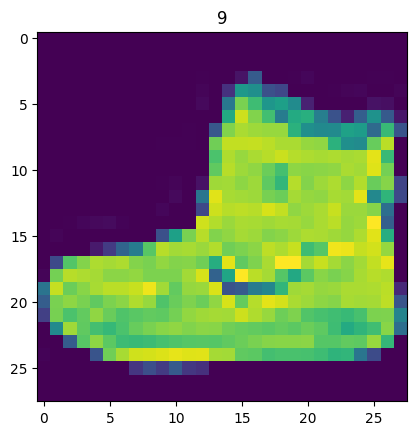

In [ ]:
import matplotlib.pyplot as plt
image, label = training_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '3')

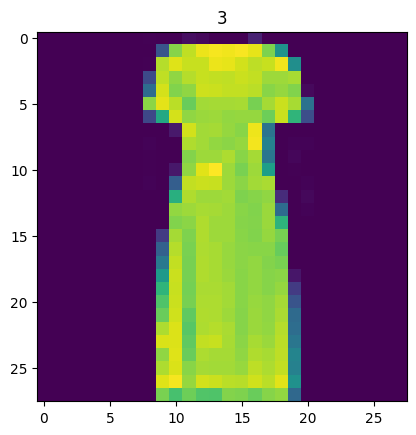

In [ ]:
import matplotlib.pyplot as plt
image, label = training_data[50]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Image shape: torch.Size([1, 28, 28])


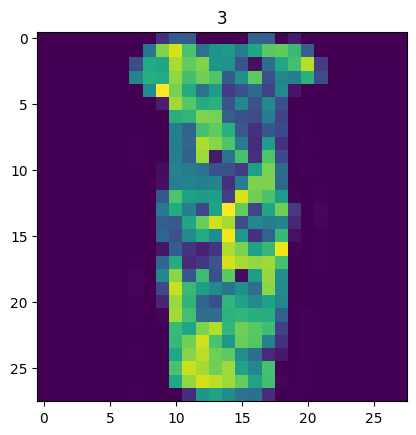

In [ ]:
import matplotlib.pyplot as plt
image, label = test_data[100]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '0')

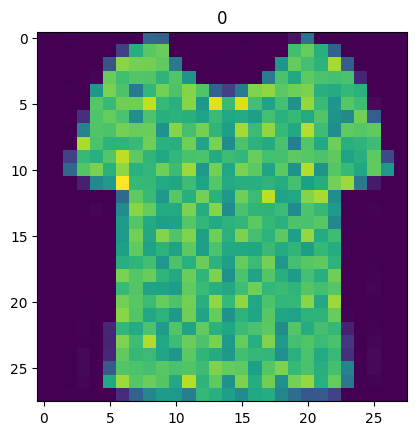

In [ ]:
import matplotlib.pyplot as plt
image, label = test_data[1000]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

## C. XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH - HÀM KÍCH HOẠT

In [ ]:
from sklearn.model_selection import train_test_split
Train_data, test_data = train_test_split(training_data, test_size=0.33, random_state=42)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(Train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### 1. Kể tên một số hàm kích hoạt đã học?
Sigmoid, Tanh, ReLU, Softmax



In [ ]:
class FashionMnist(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_size, out_features = 512),
        nn.Linear(in_features = 512, out_features = 512),
        nn.ReLU(),
        nn.Linear(in_features = 512, out_features = 256),
        nn.Linear(in_features = 256, out_features = 256),
        nn.ReLU(),
        nn.Linear(in_features = 256, out_features = 256),
        nn.Linear(in_features = 256, out_features = 10),
        nn.Softmax(dim=1),
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
model_0 = FashionMnist(input_size = 784, output_size = 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01, momentum=0.5)

In [ ]:
torch.manual_seed(42)
epochs = 20

for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)
        y_pred = nn.functional.softmax(y_pred, dim=1)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)
            test_pred1 = nn.functional.softmax(test_pred, dim=1)
            test_loss += loss_fn(test_pred1, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred1.argmax(dim=1))
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0

Train loss: 2.30256 | Test loss: 2.30255, Test acc: 10.05%

Epoch: 1

Train loss: 2.30254 | Test loss: 2.30253, Test acc: 11.08%

Epoch: 2

Train loss: 2.30252 | Test loss: 2.30250, Test acc: 13.92%

Epoch: 3

Train loss: 2.30250 | Test loss: 2.30248, Test acc: 16.33%

Epoch: 4

Train loss: 2.30247 | Test loss: 2.30245, Test acc: 18.13%

Epoch: 5

Train loss: 2.30245 | Test loss: 2.30243, Test acc: 19.69%

Epoch: 6

Train loss: 2.30241 | Test loss: 2.30239, Test acc: 21.77%

Epoch: 7

Train loss: 2.30237 | Test loss: 2.30235, Test acc: 24.16%

Epoch: 8

Train loss: 2.30233 | Test loss: 2.30230, Test acc: 27.54%

Epoch: 9

Train loss: 2.30228 | Test loss: 2.30225, Test acc: 31.84%

Epoch: 10

Train loss: 2.30222 | Test loss: 2.30218, Test acc: 35.22%

Epoch: 11

Train loss: 2.30214 | Test loss: 2.30209, Test acc: 37.04%

Epoch: 12

Train loss: 2.30204 | Test loss: 2.30197, Test acc: 38.26%

Epoch: 13

Train loss: 2.30190 | Test loss: 2.30181, Test acc: 38.44%

Epoch: 14

Train

In [ ]:
y_pred = []
y_test = []
for x, y in test_data:
  y_test.append(y)
  y_pred.append((model_0(x).argmax(dim=1)).numpy())

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

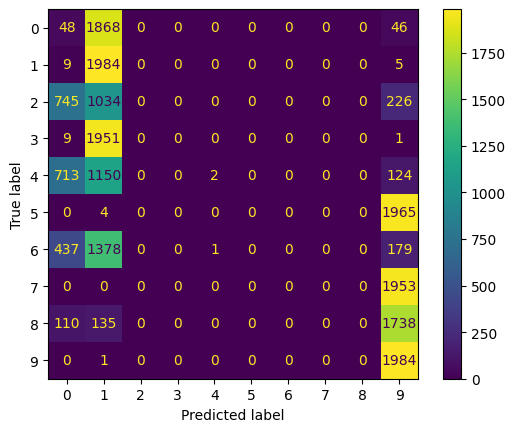

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
#cm = confusion_matrix(y_test, y_pred, labels=10)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.02      0.02      0.02      1962
           1       0.21      0.99      0.34      1998
           2       0.00      0.00      0.00      2005
           3       0.00      0.00      0.00      1961
           4       0.67      0.00      0.00      1989
           5       0.00      0.00      0.00      1969
           6       0.00      0.00      0.00      1995
           7       0.00      0.00      0.00      1953
           8       0.00      0.00      0.00      1983
           9       0.24      1.00      0.39      1985

    accuracy                           0.20     19800
   macro avg       0.11      0.20      0.08     19800
weighted avg       0.11      0.20      0.08     19800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# D. HÀM MẤT MÁT
## Kể tên một số hàm mất mát đã học?
MSE, Binary Cross-Entropy, ategorical Cross-Entropy

## E. CHUẨN HÓA MÔ HÌNH

In [ ]:
model_1 = FashionMnist(input_size = 784, output_size = 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01, momentum=0.5, weight_decay=0.01)

In [ ]:
torch.manual_seed(42)
epochs = 20

for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_1.train()
        y_pred = model_1(X)
        y_pred = nn.functional.softmax(y_pred, dim=1)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_1(X)
            test_pred1 = nn.functional.softmax(test_pred, dim=1)
            test_loss += loss_fn(test_pred1, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred1.argmax(dim=1))
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 1

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 2

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 3

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 4

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 5

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 6

Train loss: 2.30257 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 7

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 8

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 9

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 10

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 11

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 12

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 13

Train loss: 2.30258 | Test loss: 2.30258, Test acc: 10.05%

Epoch: 14

Train

In [ ]:
y_pred = []
y_test = []
for x, y in test_data:
  y_test.append(y)
  y_pred.append((model_0(x).argmax(dim=1)).numpy())

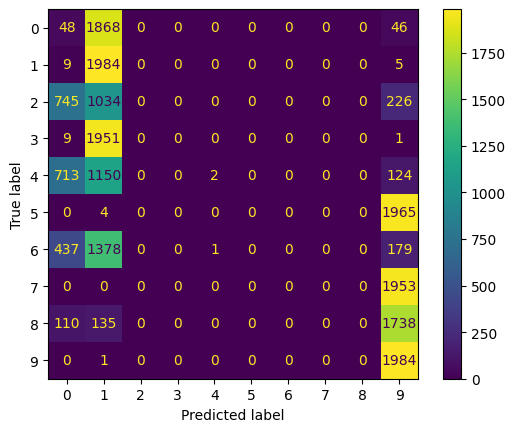

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.02      0.02      0.02      1962
           1       0.21      0.99      0.34      1998
           2       0.00      0.00      0.00      2005
           3       0.00      0.00      0.00      1961
           4       0.67      0.00      0.00      1989
           5       0.00      0.00      0.00      1969
           6       0.00      0.00      0.00      1995
           7       0.00      0.00      0.00      1953
           8       0.00      0.00      0.00      1983
           9       0.24      1.00      0.39      1985

    accuracy                           0.20     19800
   macro avg       0.11      0.20      0.08     19800
weighted avg       0.11      0.20      0.08     19800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## F. KHỎI TẠO THAM SỐ

In [ ]:
class FashionMnist(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_size, out_features = 512),
        #torch.nn.init.xavier_uniform_(nn.Linear(in_features = input_size, out_features = 512).weight),
        nn.Linear(in_features = 512, out_features = 512),
        nn.init.ones_(self.fc1.weight)
        nn.init.ones_(self.fc1.bias)
        nn.ReLU(),
        nn.Linear(in_features = 512, out_features = 256),
        nn.Linear(in_features = 256, out_features = 256),
        nn.init.ones_(self.fc2.weight)
        nn.init.ones_(self.fc2.bias)
        nn.ReLU(),
        nn.Linear(in_features = 256, out_features = 256),
        nn.Linear(in_features = 256, out_features = 10),
        nn.init.ones_(self.fc3.weight)
        nn.init.ones_(self.fc3.bias)
        nn.Softmax(dim=1),
    )
  def forward(self,x):
    return self.layer_stack(x)

In [ ]:
model_2 = FashionMnist(input_size = 784, output_size = 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01, momentum=0.5)

In [ ]:
torch.manual_seed(42)
epochs = 20

for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        y_pred = model_2(X)
        y_pred = nn.functional.softmax(y_pred, dim=1)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0

    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_2(X)
            test_pred1 = nn.functional.softmax(test_pred, dim=1)
            test_loss += loss_fn(test_pred1, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred1.argmax(dim=1))
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 1

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 2

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 3

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 4

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 5

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 6

Train loss: 2.30257 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 7

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 8

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 9

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 10

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 11

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 12

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 13

Train loss: 2.30258 | Test loss: 2.30257, Test acc: 10.54%

Epoch: 14

Train

In [ ]:
y_pred = []
y_test = []
for x, y in test_data:
  y_test.append(y)
  y_pred.append((model_2(x).argmax(dim=1)).numpy())

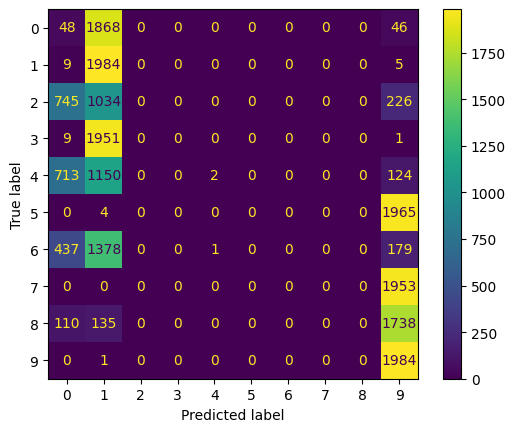

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.02      0.02      0.02      1962
           1       0.21      0.99      0.34      1998
           2       0.00      0.00      0.00      2005
           3       0.00      0.00      0.00      1961
           4       0.67      0.00      0.00      1989
           5       0.00      0.00      0.00      1969
           6       0.00      0.00      0.00      1995
           7       0.00      0.00      0.00      1953
           8       0.00      0.00      0.00      1983
           9       0.24      1.00      0.39      1985

    accuracy                           0.20     19800
   macro avg       0.11      0.20      0.08     19800
weighted avg       0.11      0.20      0.08     19800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## G. CÁC THUẬT TOÁN TỐI ƯU

In [ ]:
model_2 = FashionMnist(input_size = 784, output_size = 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(params=model_2.parameters(), lr=0.01, momentum=0.9)

In [ ]:
torch.manual_seed(42)
epochs = 10

for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        y_pred = model_2(X)
        y_pred = nn.functional.softmax(y_pred, dim=1)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0

    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_2(X)
            test_pred1 = nn.functional.softmax(test_pred, dim=1)
            test_loss += loss_fn(test_pred1, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred1.argmax(dim=1))
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0

Train loss: 2.30352 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 1

Train loss: 2.30353 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 2

Train loss: 2.30350 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 3

Train loss: 2.30353 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 4

Train loss: 2.30353 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 5

Train loss: 2.30351 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 6

Train loss: 2.30353 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 7

Train loss: 2.30351 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 8

Train loss: 2.30352 | Test loss: 2.30373, Test acc: 9.91%

Epoch: 9

Train loss: 2.30353 | Test loss: 2.30373, Test acc: 9.91%



In [ ]:
y_pred = []
y_test = []
for x, y in test_data:
  y_test.append(y)
  y_pred.append((model_2(x).argmax(dim=1)).numpy())

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1962
           1       0.00      0.00      0.00      1998
           2       0.00      0.00      0.00      2005
           3       0.10      1.00      0.18      1961
           4       0.00      0.00      0.00      1989
           5       0.00      0.00      0.00      1969
           6       0.00      0.00      0.00      1995
           7       0.00      0.00      0.00      1953
           8       0.00      0.00      0.00      1983
           9       0.00      0.00      0.00      1985

    accuracy                           0.10     19800
   macro avg       0.01      0.10      0.02     19800
weighted avg       0.01      0.10      0.02     19800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_2 = FashionMnist(input_size = 784, output_size = 10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(), lr=10^5)

In [ ]:
torch.manual_seed(42)
epochs = 10

for epoch in range(epochs):
    print(f"Epoch: {epoch}")

    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_2.train()
        y_pred = model_2(X)
        y_pred = nn.functional.softmax(y_pred, dim=1)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0

    model_2.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_2(X)
            test_pred1 = nn.functional.softmax(test_pred, dim=1)
            test_loss += loss_fn(test_pred1, y)

            test_acc += accuracy_fn(y_true=y, y_pred=test_pred1.argmax(dim=1))
        test_loss /= len(test_dataloader)

        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch: 0

Train loss: 2.30363 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 1

Train loss: 2.30362 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 2

Train loss: 2.30362 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 3

Train loss: 2.30362 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 4

Train loss: 2.30363 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 5

Train loss: 2.30362 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 6

Train loss: 2.30363 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 7

Train loss: 2.30363 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 8

Train loss: 2.30363 | Test loss: 2.30352, Test acc: 10.05%

Epoch: 9

Train loss: 2.30362 | Test loss: 2.30352, Test acc: 10.05%



In [ ]:
y_pred = []
y_test = []
for x, y in test_data:
  y_test.append(y)
  y_pred.append((model_2(x).argmax(dim=1)).numpy())

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1962
           1       0.00      0.00      0.00      1998
           2       0.00      0.00      0.00      2005
           3       0.00      0.00      0.00      1961
           4       0.10      1.00      0.18      1989
           5       0.00      0.00      0.00      1969
           6       0.00      0.00      0.00      1995
           7       0.00      0.00      0.00      1953
           8       0.00      0.00      0.00      1983
           9       0.00      0.00      0.00      1985

    accuracy                           0.10     19800
   macro avg       0.01      0.10      0.02     19800
weighted avg       0.01      0.10      0.02     19800



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
